# Лабораторная работа №2 выполнил Ерещенко Вадим
## Визуальный анализ данных

### Подключение библиотек

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [34]:
data_path = "speed_data_data.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0
5,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,4.0,6.0,4.0,6.0,5.0,2.0
6,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,7.0,4.0,6.0,7.0,6.0,5.0,2.0
7,0,21.0,69487.0,2.0,lawyer,0,4.0,9.0,7.0,6.0,5.0,6.0,6.0,7.0,NaN
8,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,9.0,8.0,8.0,7.0,7.0,2.0
9,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,6.0,8.0,10.0,8.0,6.0,6.0,2.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  8378 non-null   int64  
 1   age     8283 non-null   float64
 2   income  4279 non-null   float64
 3   goal    8299 non-null   float64
 4   career  8289 non-null   object 
 5   dec     8378 non-null   int64  
 6   attr    8176 non-null   float64
 7   sinc    8101 non-null   float64
 8   intel   8082 non-null   float64
 9   fun     8028 non-null   float64
 10  amb     7666 non-null   float64
 11  shar    7311 non-null   float64
 12  like    8138 non-null   float64
 13  prob    8069 non-null   float64
 14  met     8003 non-null   float64
dtypes: float64(12), int64(2), object(1)
memory usage: 981.9+ KB


### Одиночные признаки
#### Количественные признаки

In [36]:
data.columns

Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

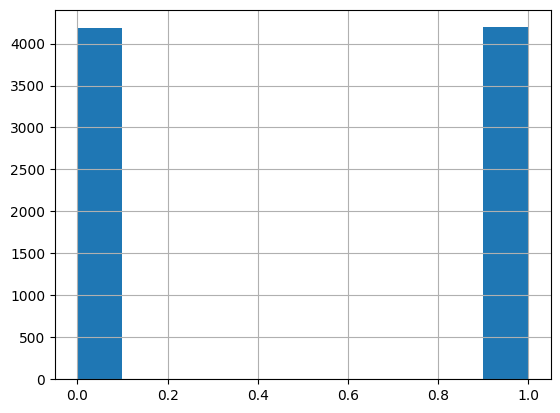

In [37]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['gender'].hist();

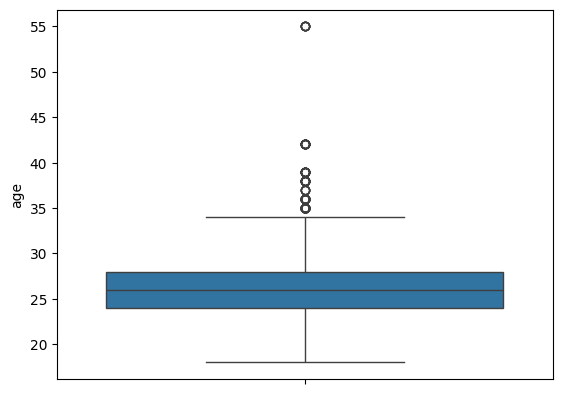

In [38]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['age']);

<ipython-input-39-aaff3c75542d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='gender',


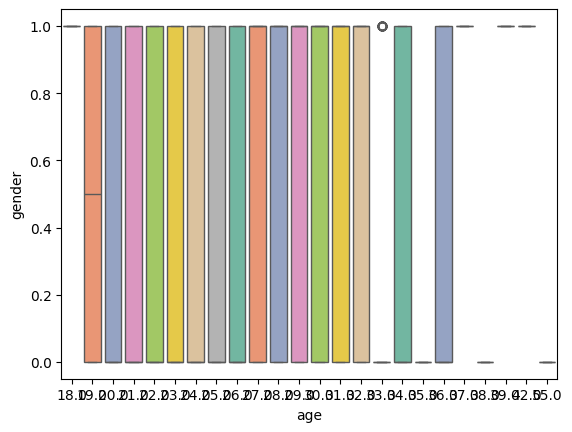

In [39]:
top_data = data[['gender', 'age']]
top_data = top_data.groupby('gender').sum()
top_data = top_data.sort_values('age',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='gender',
            x='age',
            data=data[data.gender.isin(top_data)], palette='Set2');

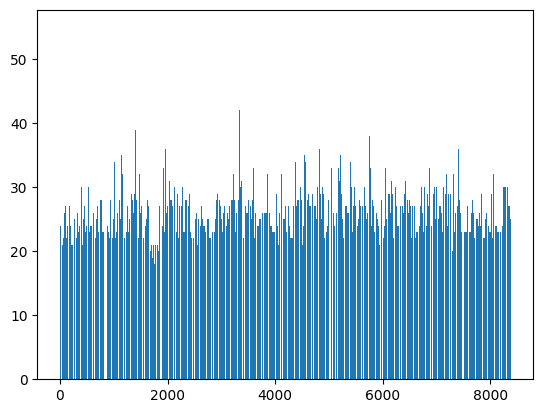

In [40]:
plt.bar(data.index, data['age'])
plt.show()

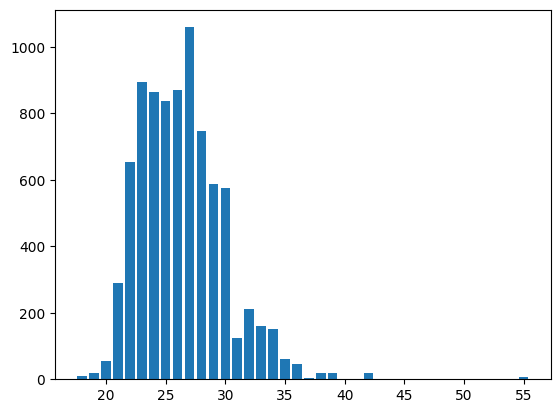

In [41]:
hist = data['age'].value_counts()
plt.bar(hist.index, hist);

In [42]:
feats=[f for f in data.columns if 'like' in f]
feats

['like']

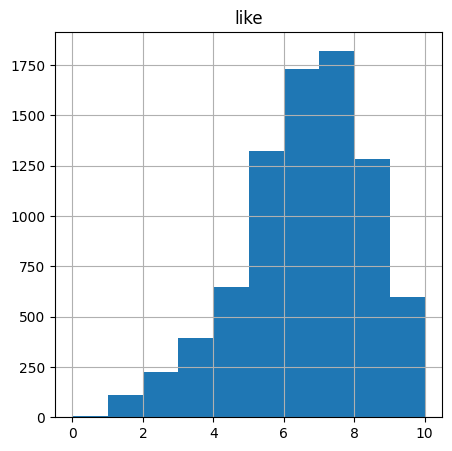

In [43]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

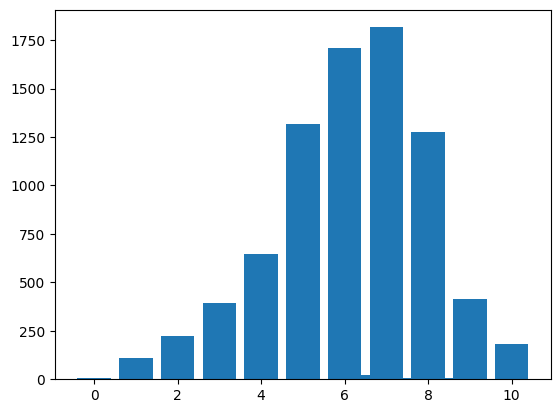

In [44]:
# определение первых n "популярных" штатов
# data['State'].value_counts().head(10)
hist = data['like'].value_counts()
plt.bar(hist.index, hist);


In [45]:
# фактически бинарный признак
data['gender'].value_counts()

gender
1    4194
0    4184
Name: count, dtype: int64

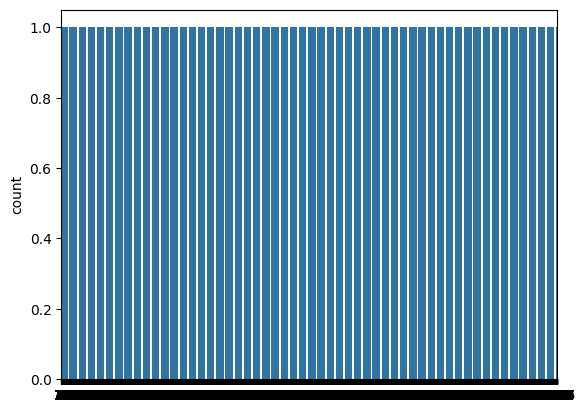

In [54]:
sns.countplot(data['like']);

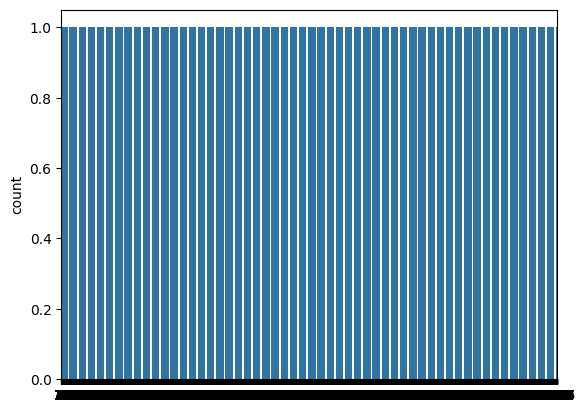

In [47]:
# гистограмма для всех штатов
sns.countplot(data['like']);

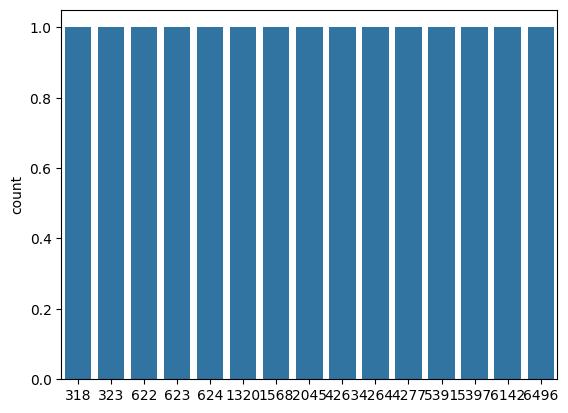

In [48]:
# гистограмма "популярных" штатов
sns.countplot(data[data['like'].isin(data['like'].value_counts().tail(5).index)]['like']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [49]:
# список колонок
data.columns

Index(['gender', 'age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc',
       'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

In [50]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'gender' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

1

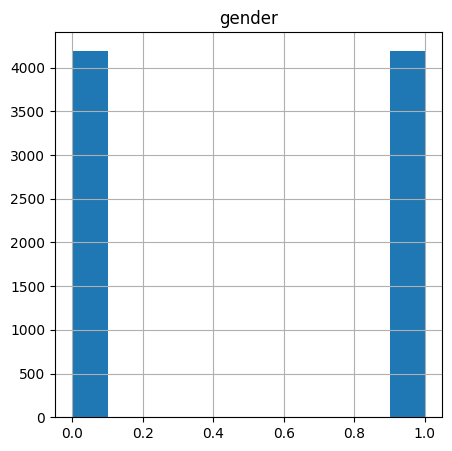

In [51]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

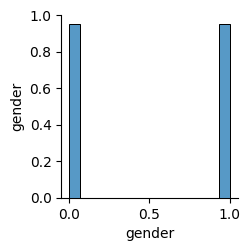

In [52]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

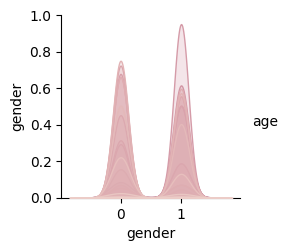

In [55]:
sns.pairplot(data[feats + ['age']], hue='age');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

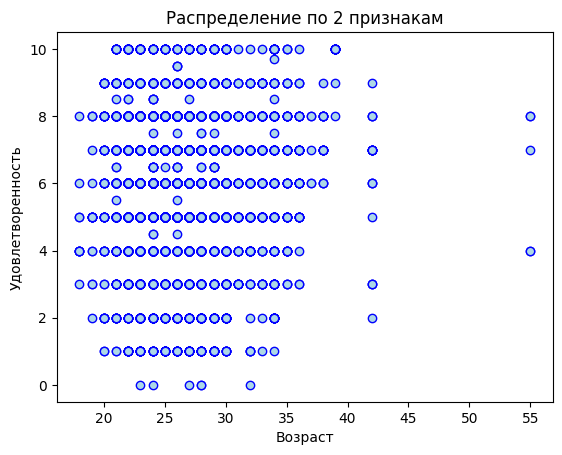

In [56]:
plt.scatter(data['age'],
            data['like'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Возраст')
plt.ylabel('Удовлетворенность')
plt.title('Распределение по 2 признакам');

### Корреляция признаков

Корреляция признаков с помощью corr

Корреля́ция — статистическая взаимосвязь двух или нескольких случайных величин (либо величин, которые можно с некоторой допустимой степенью точности считать таковыми) . При этом изменения одной или нескольких из этих величин приводят к систематическому изменению другой или других величин. Математической мерой корреляции двух случайных величин служит коэффициент корреляции.

<Axes: >

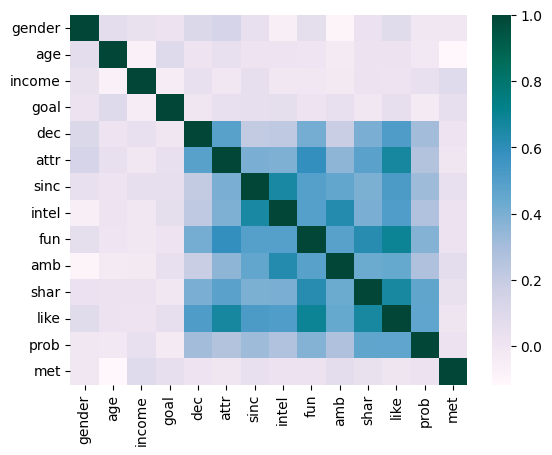

In [86]:
# Применяется функция corr() из Pandas
numeric_data = data.select_dtypes(include='number')
numeric_data.corr()

sns.heatmap(numeric_data.corr(), cmap=plt.cm.PuBuGn)

В реальных задачах анализ такой матрицы затруднен,
необходимо или автоматизировать (скрипты), или визуализировать (графики)

In [89]:
data_uncorr = numeric_data.drop(feats, axis=1)
data_uncorr.columns

Index(['age', 'income', 'goal', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb',
       'shar', 'like', 'prob', 'met'],
      dtype='object')

Из карты heatmap видно, что некоторые признаки коррелируют:
например сильная корреляция в парах (total day charge, total day minutes),
(total night charge, total night minutes).
Из таких пар можно удалить один признак

In [65]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(feats, axis=1)
data_uncorr.columns

Index(['age', 'income', 'goal', 'career', 'dec', 'attr', 'sinc', 'intel',
       'fun', 'amb', 'shar', 'like', 'prob', 'met'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков

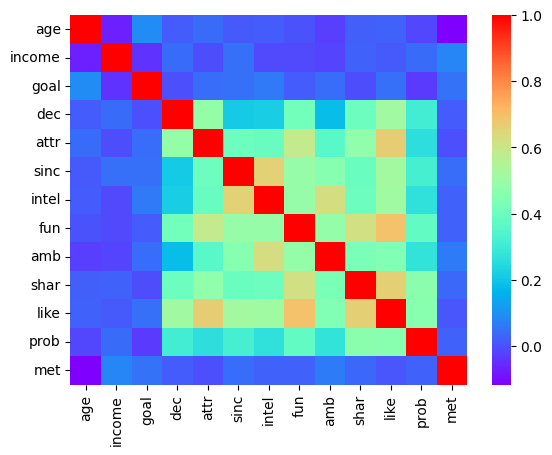

In [90]:
sns.heatmap(data_uncorr.corr(), cmap=plt.cm.rainbow);